In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv')

# Предобработка

In [177]:
math.rename({'studytime, granular': 'studytime_granular'}, axis=1, inplace=True) # Переименуем ячейку


math = math.loc[math.score >= 0.0] # Оставляем только строки в которых заплолнена ячейка с баллами за экзамен
                                   # Данные будут бесполезны для модели, если неизвестно, что ученик получил на экзамене


def outliers(column): # Функция для определения выбросов
    IQR = column.quantile(0.75) - column.quantile(0.25)
    perc25 = column.quantile(0.25)
    perc75 = column.quantile(0.75)
 
    return(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


def get_boxplot(column): # Функция для построения boxplot для номинативных переменных
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math,
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
    
def get_stat_dif(column): # Функция для оценки номинативных признаков с помощью теста Стьюдента
    cols = math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [176]:
display(math.head(10))
math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              339 non-null    object 
 1   sex                 339 non-null    object 
 2   age                 339 non-null    int64  
 3   address             327 non-null    object 
 4   famsize             315 non-null    object 
 5   Pstatus             297 non-null    object 
 6   Medu                336 non-null    float64
 7   Fedu                339 non-null    float64
 8   Mjob                321 non-null    object 
 9   Fjob                310 non-null    object 
 10  reason              325 non-null    object 
 11  guardian            310 non-null    object 
 12  traveltime          316 non-null    float64
 13  studytime           332 non-null    float64
 14  failures            320 non-null    float64
 15  schoolsup           330 non-null    object 
 16  famsup  

# school

In [99]:
pd.DataFrame(math.school.value_counts())

,school
GP,299
MS,40


Школы представлены сильно различным количеством учеников.

# sex

In [106]:
pd.DataFrame(math.sex.value_counts())

,sex
F,180
M,159


Мальчиков примерно столько же, сколько и девочек.

# age

count    339.000000
mean      16.693215
std        1.271088
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

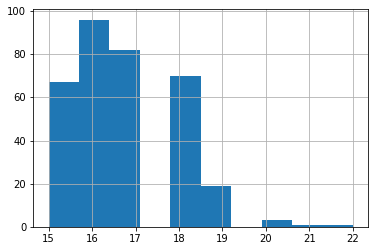

In [107]:
math.age.hist()
math.age.describe()

In [108]:
outliers(math['age'])

('25-й перцентиль: 16.0,',
 '75-й перцентиль: 18.0,',
 'IQR: 2.0, ',
 'Границы выбросов: [13.0, 21.0].')

In [109]:
age_outliers = math[math.age > 21.0]
len(age_outliers)

1

Имеется выброс (возраст 22 года).

# address

In [104]:
pd.DataFrame(math.address.value_counts(dropna=False))

,address
U,254
R,73
NaN,12


Городских жителей в 3.5 раза больше, чем деревенских. 12 ячеек не заполнены.

# famsize

In [110]:
pd.DataFrame(math.famsize.value_counts(dropna=False))

,famsize
GT3,221
LE3,94
NaN,24


У 24 учеников отсутствуют данные о размере семьи

# Pstatus

In [111]:
pd.DataFrame(math.Pstatus.value_counts(dropna=False))

,Pstatus
T,269
NaN,42
A,28


Учеников, чьи родители живут вместе, в 6.4 раз больше, чем тех, чьи родители живут раздельно. 42 ячеек не заполнены

# Medu

count    336.000000
mean       2.758929
std        1.097451
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

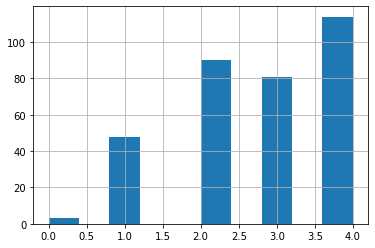

In [112]:
math.Medu.hist()
math.Medu.describe()

In [113]:
outliers(math['Medu'])

('25-й перцентиль: 2.0,',
 '75-й перцентиль: 4.0,',
 'IQR: 2.0, ',
 'Границы выбросов: [-1.0, 7.0].')

# Fedu

count    339.000000
mean       2.533923
std        1.091061
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

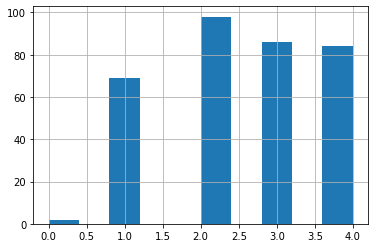

In [114]:
math.Fedu.hist()
math.Fedu.describe()

In [115]:
math = math.loc[math.Fedu <= 4.0] # Включаем только строки, которые были заполнены верно (оценка не может быть больше 4.0)

count    339.000000
mean       2.533923
std        1.091061
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

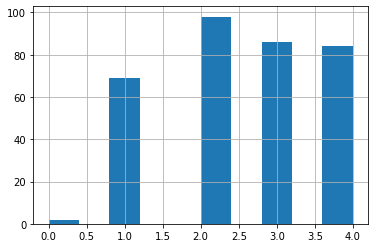

In [116]:
math.Fedu.hist()
math.Fedu.describe()

In [117]:
outliers(math['Fedu'])

('25-й перцентиль: 2.0,',
 '75-й перцентиль: 3.0,',
 'IQR: 1.0, ',
 'Границы выбросов: [0.5, 4.5].')

# Mjob

In [118]:
pd.DataFrame(math.Mjob.value_counts(dropna=False))

,Mjob
other,112
services,82
at_home,53
teacher,45
health,29
NaN,18


У многих в графе работа матери указано "другое", столбец мало информативен.

# Fjob

In [119]:
pd.DataFrame(math.Fjob.value_counts(dropna=False))

,Fjob
other,174
services,85
NaN,29
teacher,26
at_home,14
health,11


Столбец мало информативен.

# reason

In [120]:
pd.DataFrame(math.reason.value_counts(dropna=False))

,reason
course,114
reputation,92
home,87
other,32
NaN,14


Сравнимое количество учеников выбирали школы по близости к дому, образовательной программе и репутации 

# guardian

In [121]:
pd.DataFrame(math.guardian.value_counts(dropna=False))

,guardian
mother,217
father,72
NaN,29
other,21


У большинства учеников опекуном является мать

# traveltime

count    316.000000
mean       1.452532
std        0.699859
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

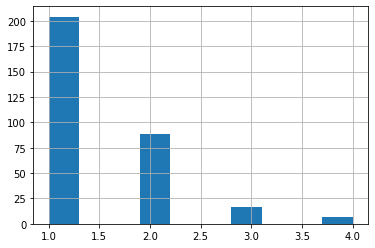

In [122]:
math.traveltime.hist()
math.traveltime.describe()

In [123]:
outliers(math['traveltime'])

('25-й перцентиль: 1.0,',
 '75-й перцентиль: 2.0,',
 'IQR: 1.0, ',
 'Границы выбросов: [-0.5, 3.5].')

In [188]:
traveltime_outliers = math[math.traveltime > 3.5]
len(traveltime_outliers)

7

# studytime

count    332.000000
mean       2.027108
std        0.849304
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

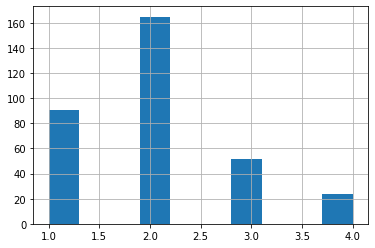

In [124]:
math.studytime.hist()
math.studytime.describe()

In [125]:
outliers(math['studytime'])

('25-й перцентиль: 1.0,',
 '75-й перцентиль: 2.0,',
 'IQR: 1.0, ',
 'Границы выбросов: [-0.5, 3.5].')

In [126]:
studytime_outliers = math[math.studytime > 3.5]
len(studytime_outliers)

24

# failures

count    320.000000
mean       0.321875
std        0.738224
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

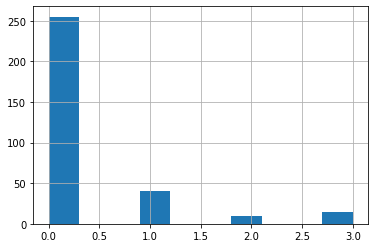

In [127]:
math.failures.hist()
math.failures.describe()

In [183]:
outliers(math['failures'])

('25-й перцентиль: 0.0,',
 '75-й перцентиль: 0.0,',
 'IQR: 0.0, ',
 'Границы выбросов: [0.0, 0.0].')

In [189]:
failures_outliers = math[math.failures > 0.0]
len(failures_outliers)

65

Данный признак сложно интерпретировать т.к. количество внеучебных неудач обозначается как n, если 1<=n<=3, иначе 0, следовательно, оценка 0 явлется неоднозначной, ведь неудач моет быть и больше 3

# schoolsup

In [128]:
pd.DataFrame(math.schoolsup.value_counts(dropna=False))

,schoolsup
no,288
yes,42
NaN,9


Большинство учеников не имели дополнительной образовательной поддержки

# famsup

In [129]:
pd.DataFrame(math.famsup.value_counts(dropna=False))

,famsup
yes,184
no,122
NaN,33


# paid

In [130]:
pd.DataFrame(math.paid.value_counts(dropna=False))

,paid
no,171
yes,134
NaN,34


# activities

In [131]:
pd.DataFrame(math.activities.value_counts(dropna=False))

,activities
yes,166
no,161
NaN,12


# nursery

In [132]:
pd.DataFrame(math.nursery.value_counts(dropna=False))

,nursery
yes,257
no,67
NaN,15


# studytime_granular

count    332.000000
mean      -6.081325
std        2.547912
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

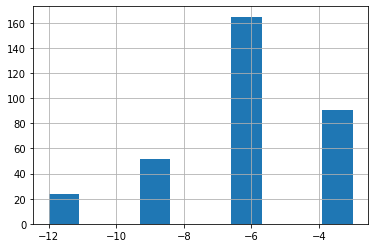

In [133]:
math.studytime_granular.hist()
math.studytime_granular.describe()

In [134]:
outliers(math['studytime_granular'])

('25-й перцентиль: -6.0,',
 '75-й перцентиль: -3.0,',
 'IQR: 3.0, ',
 'Границы выбросов: [-10.5, 1.5].')

Судя по гистограмме распределения, данный признак идентичен признаку studytime, для подтверждения этого далее проведем корреляционный анализ.

# higher

In [135]:
pd.DataFrame(math.higher.value_counts(dropna=False))

,higher
yes,305
no,17
NaN,17


# internet

In [136]:
pd.DataFrame(math.internet.value_counts(dropna=False))

,internet
yes,259
no,49
NaN,31


# romantic

In [137]:
pd.DataFrame(math.romantic.value_counts(dropna=False))

,romantic
no,208
yes,105
NaN,26


# famrel

count    339.000000
mean       3.943953
std        0.906804
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

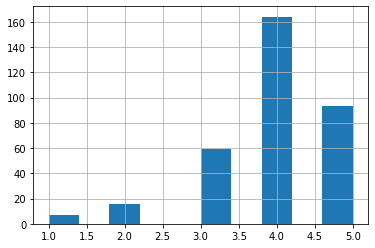

In [138]:
math.famrel.hist()
math.famrel.describe()

In [139]:
math = math.loc[math.famrel >= 1.0] # Включаем только строки, которые были заполнены верно (оценка не может быть меньше 1.0)

count    339.000000
mean       3.943953
std        0.906804
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

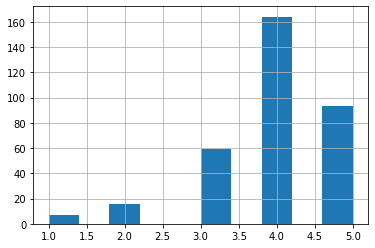

In [140]:
math.famrel.hist()
math.famrel.describe()

In [184]:
outliers(math['famrel'])

('25-й перцентиль: 4.0,',
 '75-й перцентиль: 5.0,',
 'IQR: 1.0, ',
 'Границы выбросов: [2.5, 6.5].')

In [190]:
famrel_outliers = math[math.famrel < 2.5]
len(famrel_outliers)

23

# freetime

count    332.000000
mean       3.219880
std        1.002939
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

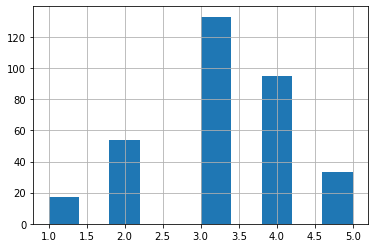

In [141]:
math.freetime.hist()
math.freetime.describe()

In [185]:
outliers(math['freetime'])

('25-й перцентиль: 3.0,',
 '75-й перцентиль: 4.0,',
 'IQR: 1.0, ',
 'Границы выбросов: [1.5, 5.5].')

In [191]:
freetime_outliers = math[math.freetime < 1.5]
len(freetime_outliers)

17

# goout

count    332.000000
mean       3.093373
std        1.104926
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

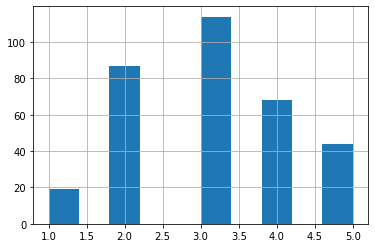

In [142]:
math.goout.hist()
math.goout.describe()

In [186]:
outliers(math['goout'])

('25-й перцентиль: 2.0,',
 '75-й перцентиль: 4.0,',
 'IQR: 2.0, ',
 'Границы выбросов: [-1.0, 7.0].')

# health

count    326.000000
mean       3.466258
std        1.393533
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

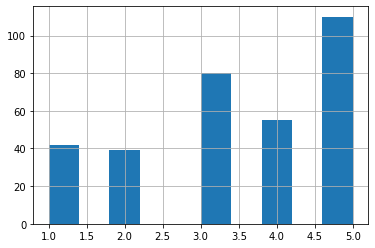

In [143]:
math.health.hist()
math.health.describe()

In [187]:
outliers(math['health'])

('25-й перцентиль: 3.0,',
 '75-й перцентиль: 5.0,',
 'IQR: 2.0, ',
 'Границы выбросов: [0.0, 8.0].')

# absences

count    328.000000
mean       7.362805
std       24.938568
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

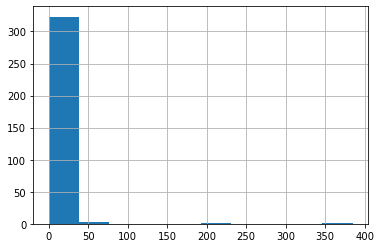

In [144]:
math.absences.hist()
math.absences.describe()

In [145]:
outliers(math['absences'])

('25-й перцентиль: 0.0,',
 '75-й перцентиль: 8.0,',
 'IQR: 8.0, ',
 'Границы выбросов: [-12.0, 20.0].')

In [192]:
absences_outliers = math[math.absences > 20.0]
len(absences_outliers)

15

# score

count    339.000000
mean      52.477876
std       22.556214
min        0.000000
25%       42.500000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

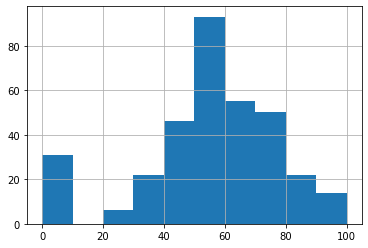

In [146]:
math.score.hist()
math.score.describe()

In [149]:
outliers(math['score'])

('25-й перцентиль: 42.5,',
 '75-й перцентиль: 70.0,',
 'IQR: 27.5, ',
 'Границы выбросов: [1.25, 111.25].')

In [194]:
score_outliers = math[(math.score < 1.25) | (math.score > 111.25)]
len(score_outliers)

31

# Корреляционный анализ

In [163]:
correlation = math.corr()

<AxesSubplot:>

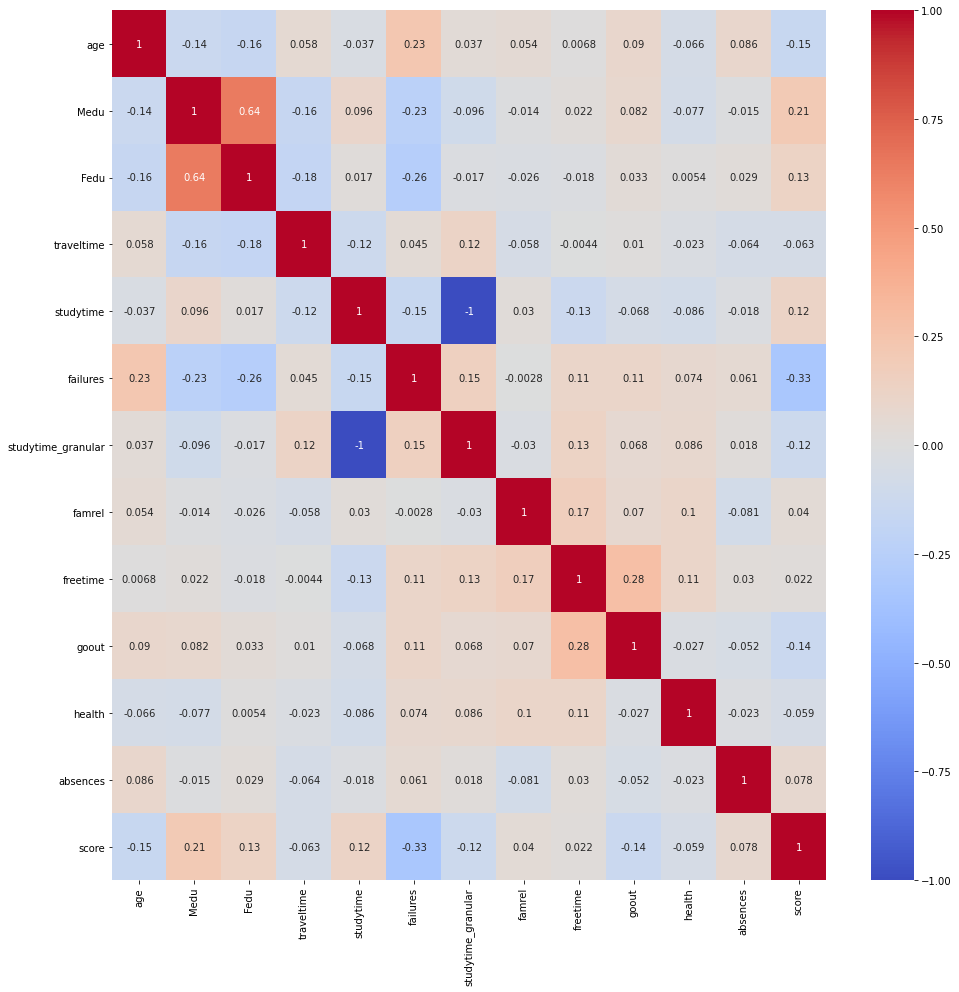

In [154]:
plt.figure(figsize=(16, 16))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

Переменные studytime и studytime_granular имеют коэффициент корреляции -1, следовательно можно исключить studytime_granular, т.к. эти переменные отражают одну и ту же характеристику, оцененную по разным шкалам.

Остальные переменные оставим для модели.

# Анализ номинативных переменных

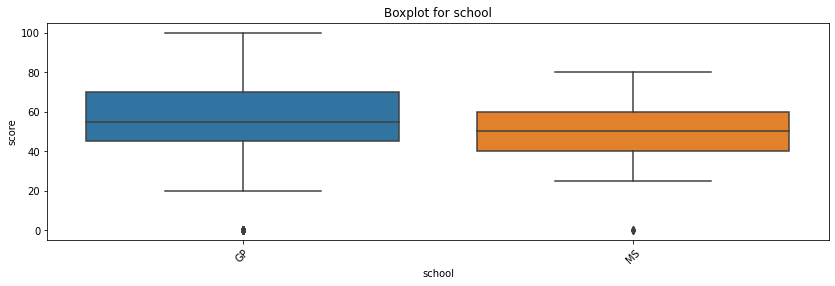

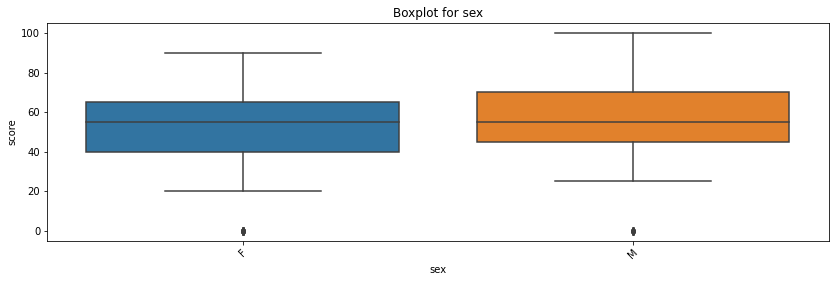

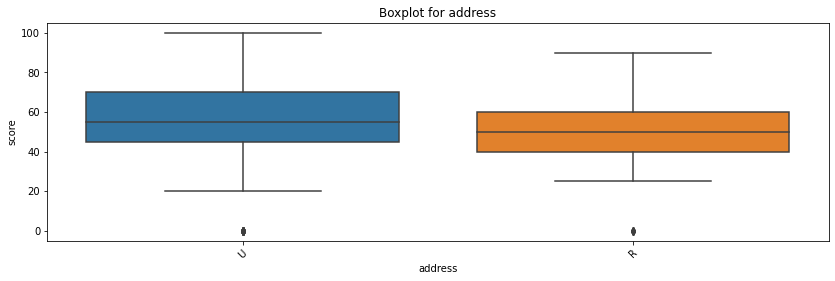

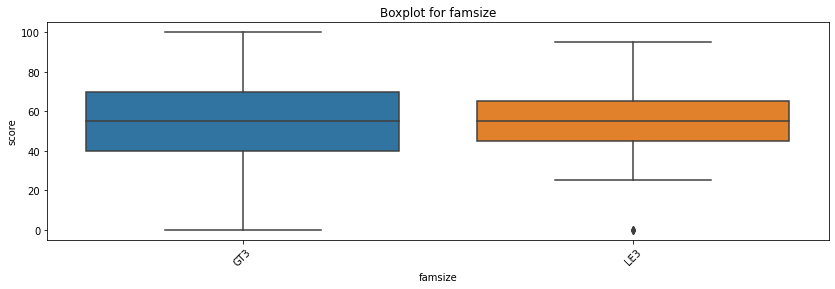

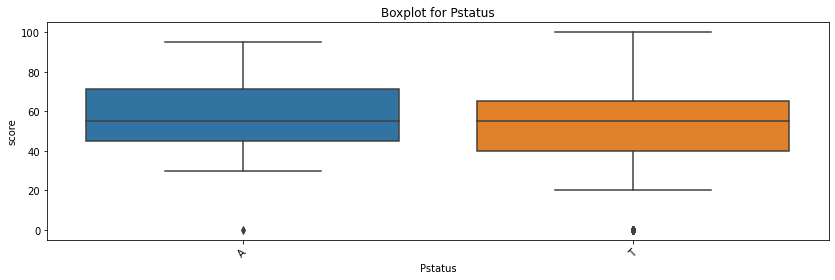

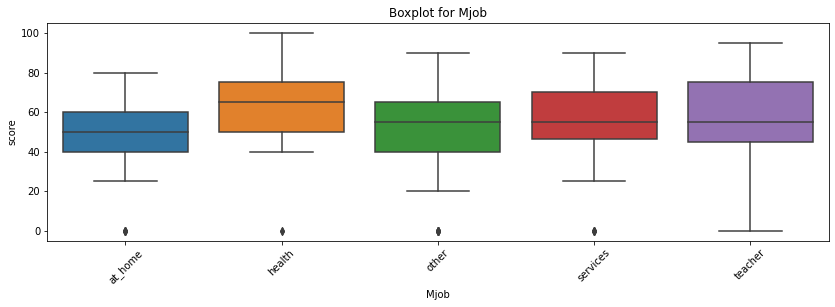

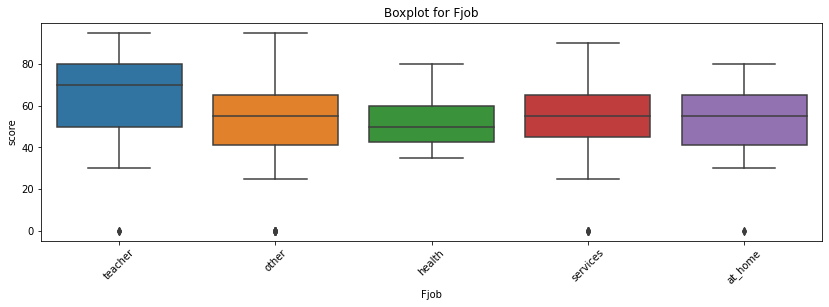

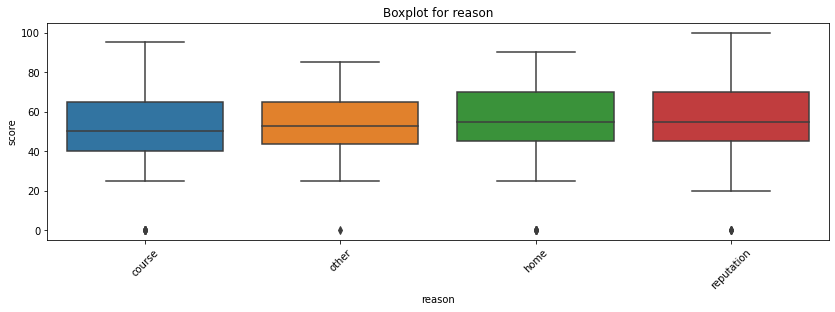

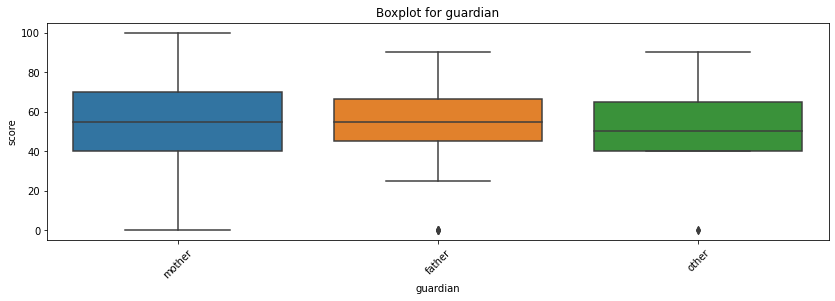

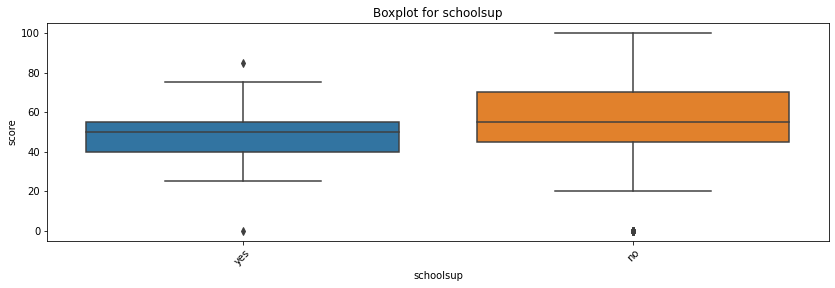

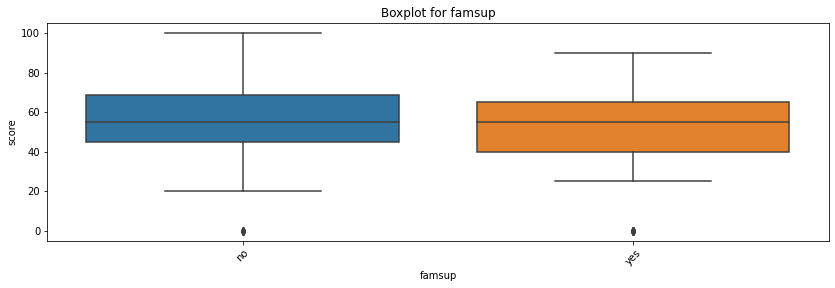

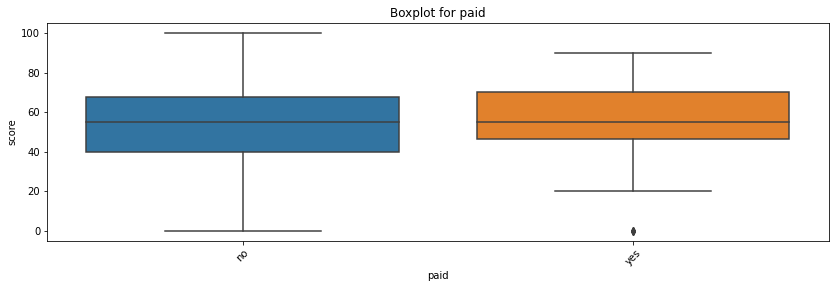

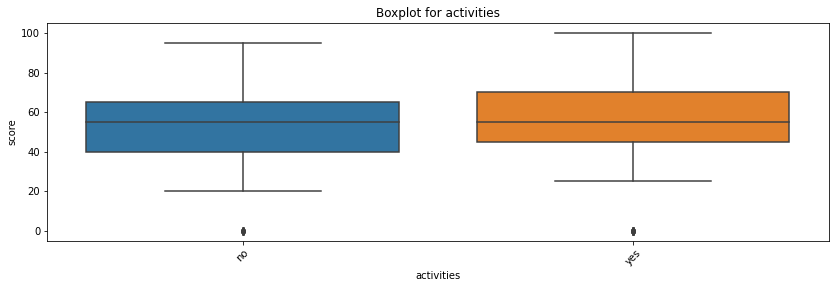

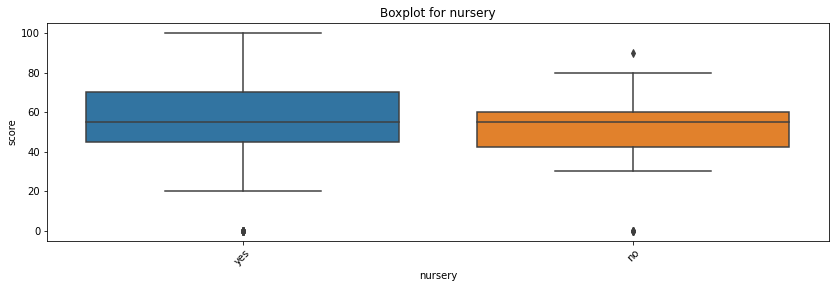

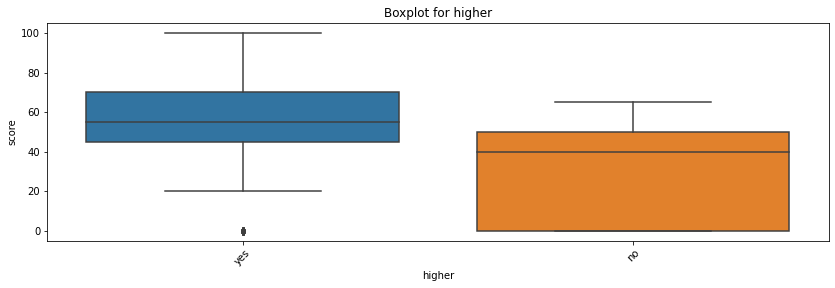

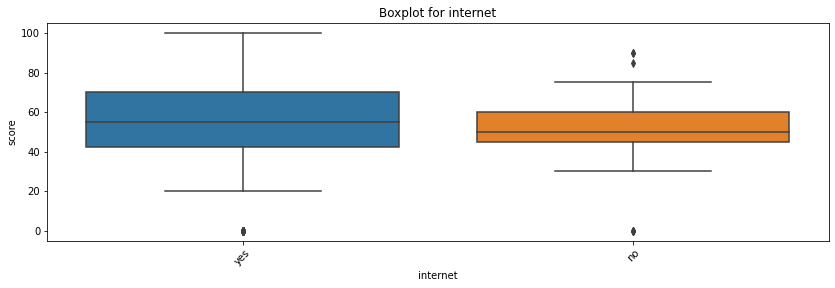

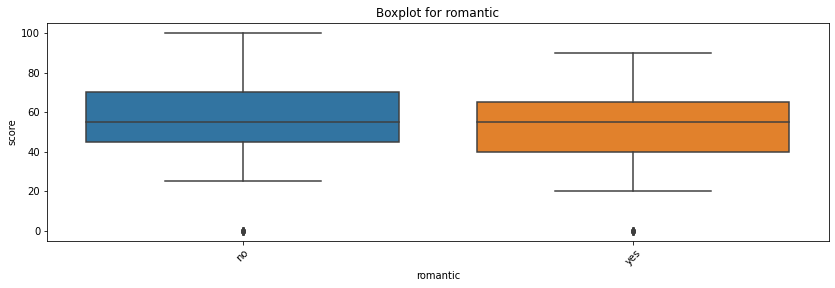

In [181]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
           'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
           'famsup', 'paid', 'activities', 'nursery', 'higher',
           'internet', 'romantic']:
    get_boxplot(col) # Посмотрим, как различаются распределения оценок на экзамене в зависимоти от номинативных переменных 

Похоже, что наибольшее влияние на распределение оценок за экзамен оказывают следующие признаки: работа матери (Mjob), работа отца (Fjob), дополнительные платные занятия по математике (paid) и желание получать высшее образование (higher).

In [178]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
           'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
           'famsup', 'paid', 'activities', 'nursery', 'higher',
           'internet', 'romantic']:
    get_stat_dif(col) # Посмотрим, есть ли статистические различия в распределении оценок на экзамене

Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher


Включим в окончательный датасет следующие переменные:

In [179]:
math_for_model = math.loc[:, ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'paid', 
                              'higher', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']]

# Выводы

В результате EDA для выявления факторов, оказывающих влияние на оценку на госэкзамене по математике были получены следующие выводы:

В данных относительно немного пустых значений.

Столбцы, содержащие информацию о работе матери и работе отца, часто содержат 'other', что делает их малоинформативными. 

Имеется достаточно много выбросов в столбцах время в пути до школы (traveltime), время на учебы помимо школы (studytime), количество внеучебных неудач (failures), studytime_granular, семейные отношения (famrel), свободное время после школы (freetime), количество пропусков занятий (absences), баллы по госэкзамену по математике (score). Устранить выбро

Наиболее важными параметрами, которые предлагается в дальнейшем использовать для построения модели, явлются возраст, образование матери, образование отца, время в пути до школы, время на учебу помимо школы, количество внеучебных неудач, дополнительные платные занятия по математике, желание получать высшее образование, количество свободного времени после школы, проведение времени с друзьями, здоровье, количество пропусков занятий.